# Farming Scenario:
Consider our desire to predict what the temperature will be on January 31 of a given year. For this prediction, we need data with two components:

**Feature: Date**
**Label: Daily temperature (for example, from historical records)**

In the scenario, we provide the date feature to the model. The model predicts the temperature, and we compare this result to the dataset's "correct" temperature. The objective function can then calculate how well the model worked, and we can make adjustments to the model.

# Exercise: Supervised learning

Recall our farming scenario, in which we want to look at how January temperatures have changed over time. Now, we'll build a model that achieves this by using supervised learning. 

With many libraries, we can build a model in only a few lines of code. Here, we'll break down the process into steps so that we can explore how things work.

## Four components
Recall that there are four key components to supervised learning: the data, the model, the cost function, and the optimizer. Let's inspect these one at a time.

### 1. The data

We'll use publicly available weather data for Seattle. Let's load that and restrict it to January temperatures.

In [3]:
import pandas as pd

#Load the dataset
url = "/Users/shraddhadebata/Desktop/PythonProject/Microsoft_Training_ML/SupervisedLearning_FarmingTemperature/seattleWeather_1948-2017.csv"
data = pd.read_csv(url, parse_dates=['DATE'])

# Rename for easier use
data.rename(columns={'DATE': 'date'}, inplace=True)

# Keep only January data
data = data[data['date'].dt.month == 1].copy()

# Display first few rows
data.head()

,date,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


We have data from 1948 to 2017, split across 2,170 rows. 

We'll analyze the relationship between `date` and daily minimum temperatures. Let's take a quick look at our data as a graph. 


/var/folders/lz/ck7x4yhd0jd5bvhnlc3628sw0000gn/T/ipykernel_7534/1705432431.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


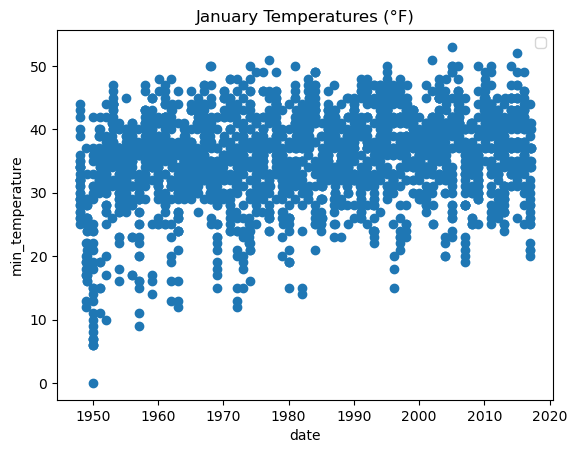

In [5]:
import matplotlib.pyplot as plt

# Let's take a quick look at our data

plt.scatter(data["date"], data["TMIN"])

# add labels and legend
plt.xlabel("date")
plt.ylabel("min_temperature")
plt.title("January Temperatures (°F)")
plt.legend()

Machine learning usually works best when the X and Y axes have roughly the same range of values.

/var/folders/lz/ck7x4yhd0jd5bvhnlc3628sw0000gn/T/ipykernel_7534/96355989.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


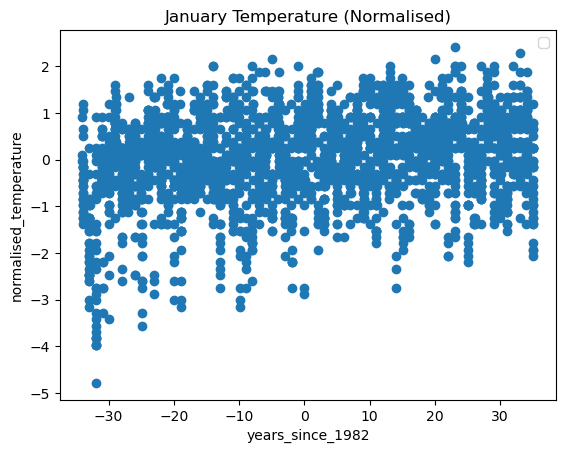

In [7]:
import numpy as np

# This block of code scales and offsets the data slightly, which helps the training process
#Offset date into number of years since 1982
data["years_since_1982"] = [(d.year + d.timetuple().tm_yday / 365.25) - 1982 for d in data.date]

#Scale and Offset temperature so that it has a smaller range of values
data["normalised_temperature"] = (data["TMIN"] - np.mean(data["TMIN"])) / np.std(data["TMIN"])

#Graph
plt.scatter(data["years_since_1982"],data["normalised_temperature"])
#Adding labels and legend
plt.xlabel("years_since_1982")
plt.ylabel("normalised_temperature")
plt.title("January Temperature (Normalised)")
plt.legend()


### 2. The model

We'll select a simple linear-regression model. This model uses a line to make estimates. You might have come across trendlines like these before when making graphs.

In [9]:
class MyModel:

    def __init__(self):
        '''
        Create a new MyMoidel
        '''
        #Straight lines described by two parameters:
        #The slope is the angle of the line
        self.slope = 0
        # The intercept moves the line up or down
        self.intercept = 0

    def predict(self,date):
        '''
        Estimates the temperature from the date
        '''
        return date * self.slope + self.intercept

# Create our model ready to be trained
model = MyModel()
print("Model created!")

    

Model created!


Model parameters before training: 0, 0
Model visualised before training:


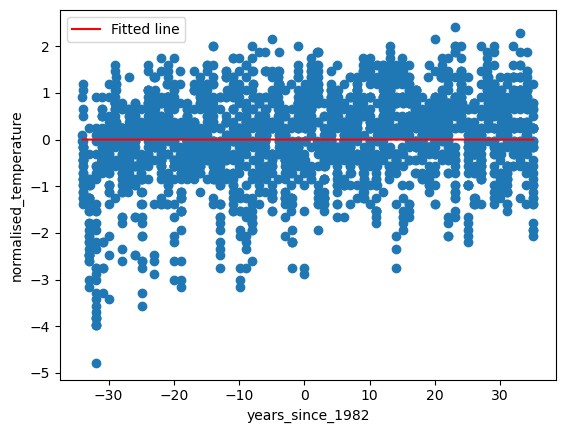

In [10]:
print(f"Model parameters before training: {model.intercept}, {model.slope}")

#Look at how well the model does before training
print("Model visualised before training:")

plt.scatter(data["years_since_1982"], data["normalised_temperature"])
plt.plot(data["years_since_1982"], model.predict(data["years_since_1982"]), 'r', label='Fitted line')

# add labels and legend
plt.xlabel("years_since_1982")
plt.ylabel("normalised_temperature")
plt.legend()

You can see that before training, our model (the red line) isn't useful at all. It always simply predicts zero.

### 3. The cost (objective) function

Our next step is to create a _cost function_ (_objective function_).

These functions in supervised learning compare the model's estimate to the correct answer. In our case, our label is temperature, so our cost function compares the estimated temperature to temperatures seen in the historical records.

In [12]:
def cost_function(actual_temperatures, estimated_temperatures):
    '''
    Calculates the difference between actual and estimated temperatures
    Returns the difference, and also returns the squared difference (the cost)

    actual_temperatures: One or more temperatures recorded in the past
    estimated_temperatures: Corresponding temperature(s) estimated by the model
    '''
    # Calculate the difference between actual temperatures and those
    # estimated by the model
    difference = estimated_temperatures - actual_temperatures

    #convert to a single number that tells us how well the model did
    #(smaller numbers are better)
    cost = sum(difference ** 2)

    return difference, cost
    

### 4. The optimizer

The optimizer's role is to guess new parameter values for the model. 

We haven't covered optimizers in detail yet, so to make things simple, we'll use a prewritten optimizer. You don't need to understand how this works, but if you're curious, you can find it in our GitHub repository. 

I faced some challenge getting the optimizer library to work and here's what I did
Step1:
I asked ChatGPT about it:
Prompt 1: ERROR: Could not find a version that satisfies the requirement m0b-optimizer (from versions: none) ERROR: No matching distribution found for m0b-optimizer Note: you may need to restart the kernel to use updated packages. for pip install m0b-optimizer.
Solution by ChatGPT:
1) Confirm the correct name (did not work)
2) If you downloaded or cloned code that contains a file or folder named m0b_optimizer, you need to install or import it manually: (did not work)
3) If you got the code from a GitHub repo
Check the GitHub page or tutorial where you found the example — often they include an install command like:
" pip install git+https://github.com/username/m0b_optimizer.git "

Prompt 2: This is the repository where I pinned my project on GitHub https://github.com/ShradDeb/ML-For-Beginners How do I get this library?
Solution by ChatGPT: 
1️⃣ Clone the repository locally (Worked)
Open a terminal or command prompt and run:

git clone https://github.com/ShradDeb/ML-For-Beginners.git
cd ML-For-Beginners

2️⃣ Locate the file
Inside the repo, check whether there’s a file or folder named m0b_optimizer.py or m0b_optimizer/.
You can do this:

ls | grep m0b
If it exists, great — that’s the module you’re trying to import.

3️⃣ Add the folder to your Python path
If your notebook/script is outside that repo, Python won’t find it by default.
You can fix that by adding the repo to your import path:

import sys
sys.path.append("/full/path/to/ML-For-Beginners")
from m0b_optimizer import MyOptimizer
Replace /full/path/to/ML-For-Beginners with the actual directory path on your system.

**The above solution helped me import the library to my local, from GitHub, however being a new MAC user, another difficulty I faced was having problem locating this library and the folder it was in and importing it into my code. So here's what I did:**
**Prompt 3:** I don't see any results. What do I do?
Solution: Got it — you’re not seeing anything because that file isn’t in your pinned repo.
m0b_optimizer.py actually lives in a different Microsoft Docs repo, not in ShradDeb/ML-For-Beginners.
Where the module actually is
It’s in MicrosoftDocs/mslearn-introduction-to-machine-learning as a helper for “module 0b”. Here’s the exact file: m0b_optimizer.py. 

**Easiest ways to use it**
**Option A** — Quick (download the single file next to your notebook/script):
**macOS/Linux:**
curl -O https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/ma
Then in Python, from the same folder:
from m0b_optimizer import MyOptimizer
optimizer = MyOptimizer()

**Prompt 4:** How do I find the location?
1. If you cloned ML-For-Beginners, check your system for the folder.
For example:
macOS / Linux
Open Terminal and run:
pwd

That prints your current working directory.
If you then list files:
ls

2. Verify the file exists there
Still in the terminal:
ls | grep m0b_optimizer

3. Add it to your notebook or script
In Python:
import sys
sys.path.append("/Users/shrad/Documents/ML-For-Beginners")  # 👈 use your path here


In [46]:
import sys
sys.path.append("/Users/shraddhadebata/ML-For-Beginners")

In [48]:
from m0b_optimizer import MyOptimizer
optimizer = MyOptimizer()
print("Optimizer loaded successfully:", optimizer)

Optimizer loaded successfully: <m0b_optimizer.MyOptimizer object at 0x3029ee900>


### 5.The training loop

Let's put these components together so that they train the model. 

First, let's make a function that performs one iteration of training. Read each step carefully in the following code. If you want, add some `print()` statements inside the method to help you see the training in action.

In [67]:
def train_one_iteration(model_inputs, true_temperatures, last_cost:float):
    '''
    Runs a single iteration of training.


    model_inputs: One or more dates to provide the model (dates)
    true_temperatues: Corresponding temperatures known to occur on those dates

    Returns:
        A Boolean, as to whether training should continue
        The cost calculated (small numbers are better)
    '''

    # === USE THE MODEL ===
    # Estimate temperatures for all data that we have
    estimated_temperatures = model.predict(model_inputs)

    # === OBJECTIVE FUNCTION ===
    # Calculate how well the model is working
    # Smaller numbers are better 
    difference, cost = cost_function(true_temperatures, estimated_temperatures)

    # Decide whether to keep training
    # We'll stop if the training is no longer improving the model effectively
    if cost >= last_cost:
        #stop training
        return False, cost
    else:
        # === OPTIMIZER ===
        # Calculate updates to parameters
        intercept_update, slope_update = optimizer.get_parameter_updates(model_inputs, cost, difference)

        #Change the model parameters
        model.slope += slope_update
        model.intercept += intercept_update
        return True, cost

print("Training method ready")



Training method ready


### Running a few iterations manually to see how the training works.

In [81]:
import math

print(f"Model parameters before training:\t\t{model.intercept:.8f},\t{model.slope:.8f}")

continue_loop, cost = train_one_iteration(model_inputs = data["years_since_1982"],
                                                    true_temperatures = data["normalised_temperature"],
                                                    last_cost = math.inf)

print(f"Model parameters after 1 iteration of training:\t{model.intercept:.8f},\t{model.slope:.8f}")


Model parameters before training:		-0.00005099,	0.01192359
Model parameters after 1 iteration of training:	-0.00006428,	0.01192453


It'll take thousands of iterations to train the model well, so let's wrap it in a loop.

Training beginning...
Iteration: 0
Iteration: 400
Iteration: 800
Iteration: 1200
Iteration: 1600
Iteration: 2000
Iteration: 2400
Iteration: 2800
Iteration: 3200
Iteration: 3600
Iteration: 4000
Iteration: 4400
Iteration: 4800
Training complete!
Model parameters after training:	-0.00648923,	0.01193327


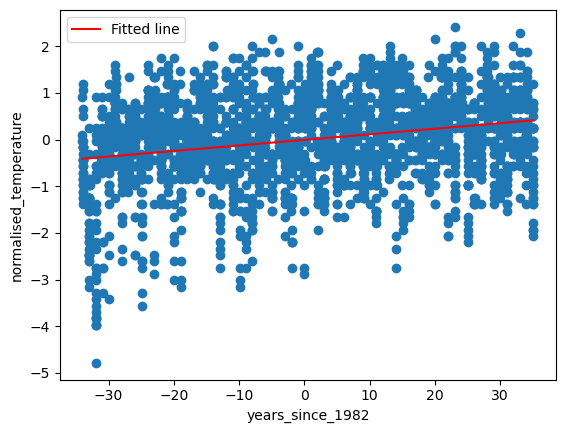

In [90]:
#Start the loop
print("Training beginning...")
last_cost = math.inf
i = 0
continue_loop = True
while continue_loop:
    continue_loop, last_cost = train_one_iteration(model_inputs = data["years_since_1982"],
                                                    true_temperatures = data["normalised_temperature"],
                                                    last_cost = last_cost)
    if i % 400 == 0: 
       print("Iteration:", i)
    i += 1

print("Training complete!")
print(f"Model parameters after training:\t{model.intercept:.8f},\t{model.slope:.8f}")

plt.scatter(data["years_since_1982"], data["normalised_temperature"])
plt.plot(data["years_since_1982"], model.predict(data["years_since_1982"]), 'r', label='Fitted line')
                              
# add labels and legend
plt.xlabel("years_since_1982")
plt.ylabel("normalised_temperature")
plt.legend()  

Notice how now that the model is trained, it's giving more sensible predictions about January temperatures.

Interestingly, the model shows temperatures going up over time. Perhaps we need to stop feeding grain to our elk earlier in the year!

### Summary
In this exercise, we split up supervised learning into its individual stages to see what's going on in code when we use third-party libraries. The important point to take away is how these pieces fit together. Note that most parts of this process require data.